<a href="https://colab.research.google.com/github/hejin8307/Agricultural_Machine_Analysis/blob/main/%EA%B8%B0%EA%B0%84_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,830 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155219 files and d

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib
print(matplotlib.matplotlib_fname())

plt.rcParams['font.family'] = 'NanumGothic'

/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc


In [ ]:
# data = pd.read_csv('D:\\python\\bigdataproject\\data.csv', encoding = 'euc-kr')
data = pd.read_csv('/content/drive/MyDrive/공빅데-농기계/data.csv', encoding = 'euc-kr')
data.head(1)
# data 에 대한 정의 : 임대내역 데이터 설명

,Unnamed: 0,임대사업장,임대기간,주소,임대농기계2,구분,종류,기종2
0,0,서부분소,2018-04-20∼2018-04-21,경상북도 안동시 풍산읍,서플라우(트),트랙터및작업기,플라우,서플라우(트)


# data 에 일일 단위로 feature 추가하려고 했음

In [ ]:
data = data.drop(['Unnamed: 0','임대농기계2','기종2'], axis = 1)

In [ ]:
data['start'] = data['임대기간'].str.split('∼').str[0]
data['end'] = data['임대기간'].str.split('∼').str[1]

,임대사업장,임대기간,주소,구분,종류,start,end
0,서부분소,2018-04-20∼2018-04-21,경상북도 안동시 풍산읍,트랙터및작업기,플라우,2018-04-20,2018-04-21
1,서부분소,2018-04-03∼2018-04-03,경상북도 안동시 풍산읍,트랙터및작업기,비료살포기,2018-04-03,2018-04-03
2,북부분소,2018-08-22∼2018-08-26,경상북도 안동시 중구동,자주형파종기,파종기,2018-08-22,2018-08-26


In [ ]:
# data['start_year'] = data['start'].str.split('-').str[0]
# data['start_month'] = data['start'].str.split('-').str[1]
# data['start_day'] = data['start'].str.split('-').str[2]
# data['end_day'] = data['end'].str.split('-').str[2]

,임대사업장,임대기간,주소,구분,종류,start,end,start_year,start_month,start_day,end_day
0,서부분소,2018-04-20∼2018-04-21,경상북도 안동시 풍산읍,트랙터및작업기,플라우,2018-04-20,2018-04-21,2018,04,20,21
1,서부분소,2018-04-03∼2018-04-03,경상북도 안동시 풍산읍,트랙터및작업기,비료살포기,2018-04-03,2018-04-03,2018,04,03,03
2,북부분소,2018-08-22∼2018-08-26,경상북도 안동시 중구동,자주형파종기,파종기,2018-08-22,2018-08-26,2018,08,22,26


In [ ]:
data['start'] = pd.to_datetime(data['start'])
data['end'] = pd.to_datetime(data['end'])

,임대사업장,임대기간,주소,구분,종류,start,end,start_year,start_month,start_day,end_day
0,서부분소,2018-04-20∼2018-04-21,경상북도 안동시 풍산읍,트랙터및작업기,플라우,2018-04-20,2018-04-21,2018,04,20,21


In [ ]:
data['end-start'] = data['end'] - data['start']
data['end-start'].value_counts()

0 days      16713
1 days       3497
2 days        960
3 days        111
4 days         35
5 days         11
6 days          8
14 days         4
8 days          1
15 days         1
116 days        1
9 days          1
Name: end-start, dtype: int64

In [ ]:
day0 = data[data['end-start'] == '0 days']
day0 = day0[['임대사업장','주소','구분','종류','start']]

In [ ]:
day0.rename(columns = {'start':'빌린날짜'}, inplace = True)
# day0[['빌린날짜','임대사업장','주소','구분','종류']]
day0.sort_values('빌린날짜')

,임대사업장,주소,구분,종류,빌린날짜
12,북부분소,경상북도 안동시 도산면,탈곡기및정선기,콩정선기,2018-01-02
4,서부분소,경상북도 안동시 풍천면,탈곡기및정선기,콩정선기,2018-01-02
5,서부분소,경상북도 안동시 옥동,탈곡기및정선기,콩정선기,2018-01-02
9,북부분소,경상북도 안동시 와룡면,탈곡기및정선기,콩정선기,2018-01-02
6,농업기술센터,경상북도 안동시 임하면,기타임대농기계,퇴비살포기,2018-01-03
...,...,...,...,...,...
21334,농업기술센터,경상북도 안동시 임하면,관리기및작업기,보행관리기,2020-12-31
21335,농업기술센터,경상북도 안동시 임하면,관리기및작업기,보행관리기,2020-12-31
21336,농업기술센터,경상북도 안동시 임하면,관리기및작업기,휴립기,2020-12-31
21339,농업기술센터,경상북도 안동시 송하동,탈곡기및정선기,콩정선기,2020-12-31


## 기간 하루

In [ ]:
day1 = data[data['end-start'] == '1 days']
day1 = day1[['임대사업장','주소','구분','종류','start','end']]
day1.head(2)

,임대사업장,주소,구분,종류,start,end
0,서부분소,경상북도 안동시 풍산읍,트랙터및작업기,플라우,2018-04-20,2018-04-21
7,농업기술센터,경상북도 안동시 임하면,탈곡기및정선기,동력탈곡기,2018-01-03,2018-01-04


In [ ]:
import datetime

In [ ]:
#임대사업장>주소>구분>종류>start 데이터프레임 만들고 start에 1일 더해서 행 추가할 순 없나?
# axis = 0 으로 합치면?
day1['start'] + datetime.timedelta(days=1)

0       2018-04-21
7       2018-01-04
11      2018-01-04
18      2018-01-07
20      2018-01-07
           ...    
21304   2020-12-29
21317   2020-12-30
21337   2021-01-02
21338   2021-01-02
21340   2021-01-02
Name: start, Length: 3497, dtype: datetime64[ns]

In [ ]:
day1ver2 = day1.copy()
day1ver2['start'] = day1ver2['start'] + datetime.timedelta(days=1)
# day1ver2

,임대사업장,주소,구분,종류,start,end
0,서부분소,경상북도 안동시 풍산읍,트랙터및작업기,플라우,2018-04-21,2018-04-21
7,농업기술센터,경상북도 안동시 임하면,탈곡기및정선기,동력탈곡기,2018-01-04,2018-01-04
11,북부분소,경상북도 안동시 중구동,기타임대농기계,퇴비살포기,2018-01-04,2018-01-04
18,서부분소,경상북도 안동시 송하동,기타임대농기계,퇴비살포기,2018-01-07,2018-01-07
20,북부분소,경상북도 안동시 예안면,기타임대농기계,동력파쇄기,2018-01-07,2018-01-07
...,...,...,...,...,...,...
21304,농업기술센터,경상북도 안동시 강남동,트랙터및작업기,잔가지파쇄기,2020-12-29,2020-12-29
21317,서부분소,경상북도 안동시 안기동,기타임대농기계,굴삭기,2020-12-30,2020-12-30
21337,농업기술센터,경상북도 안동시 임하면,기타임대농기계,퇴비살포기,2021-01-02,2021-01-02
21338,농업기술센터,경상북도 안동시 임하면,기타임대농기계,퇴비살포기,2021-01-02,2021-01-02


In [ ]:
day1.drop(['end'], axis = 1, inplace = True)
day1ver2.drop(['end'], axis = 1, inplace = True)

In [ ]:
# 뒤
tmpdf = pd.concat([day1, day1ver2], axis = 0)
# tmpdf.groupby(['임대사업장','주소','구분','종류'])

In [ ]:
tmpdf.sort_values(['start']).set_index('start')

,임대사업장,주소,구분,종류
start,,,,
2018-01-03,농업기술센터,경상북도 안동시 임하면,탈곡기및정선기,동력탈곡기
2018-01-03,북부분소,경상북도 안동시 중구동,기타임대농기계,퇴비살포기
2018-01-04,농업기술센터,경상북도 안동시 임하면,탈곡기및정선기,동력탈곡기
2018-01-04,북부분소,경상북도 안동시 중구동,기타임대농기계,퇴비살포기
2018-01-06,서부분소,경상북도 안동시 송하동,기타임대농기계,퇴비살포기
...,...,...,...,...
2021-01-01,농업기술센터,경상북도 안동시 임하면,기타임대농기계,퇴비살포기
2021-01-01,농업기술센터,경상북도 안동시 임하면,기타임대농기계,퇴비살포기
2021-01-02,농업기술센터,경상북도 안동시 임하면,기타임대농기계,퇴비살포기


## 기간 이틀

In [ ]:
day2 = data[data['end-start'] == '2 days']
day2 = day2[['임대사업장','주소','구분','종류','start']]
day2.head(1)

,임대사업장,주소,구분,종류,start
29,농업기술센터,경상북도 안동시 와룡면,기타임대농기계,휴대용자동전동가위,2018-01-13


In [ ]:
for i in range(2) : 
    globals()['day2ver{}'.format(i)] = day2.copy()

In [ ]:
day2ver0['start'] = day2['start'] + datetime.timedelta(days=1)
day2ver1['start'] = day2['start'] + datetime.timedelta(days=2)

In [ ]:
tmpdf2 = pd.concat([day2, day2ver0, day2ver1], axis = 0)
tmpdf2.sort_values(['start']).set_index('start')

,임대사업장,주소,구분,종류
start,,,,
2018-01-13,농업기술센터,경상북도 안동시 와룡면,기타임대농기계,휴대용자동전동가위
2018-01-14,농업기술센터,경상북도 안동시 와룡면,기타임대농기계,휴대용자동전동가위
2018-01-15,농업기술센터,경상북도 안동시 와룡면,기타임대농기계,휴대용자동전동가위
2018-01-22,북부분소,경상북도 안동시 와룡면,기타임대농기계,동력파쇄기
2018-01-23,북부분소,경상북도 안동시 와룡면,기타임대농기계,동력파쇄기
...,...,...,...,...
2020-12-27,농업기술센터,경상북도 안동시 강남동,트랙터및작업기,잔가지파쇄기
2020-12-27,북부분소,경상북도 안동시 와룡면,기타임대농기계,휴대용자동전동가위
2020-12-29,농업기술센터,경상북도 안동시 길안면,기타임대농기계,농업용고소작업차


## 기간 삼일

In [ ]:
day3 = data[data['end-start'] == '3 days']
day3 = day3[['임대사업장','주소','구분','종류','start']]

In [ ]:
for i in range(3) : 
    globals()['day3ver{}'.format(i)] = day3.copy()

In [ ]:
for i in range(3) :
    globals()['day3ver{}'.format(i)]['start'] = day3['start'] + datetime.timedelta(days = i+1)

In [ ]:
tmpdf3 = pd.concat([day3, day3ver0, day3ver1, day3ver2], axis = 0)
tmpdf3.sort_values(['start']).set_index('start')

,임대사업장,주소,구분,종류
start,,,,
2018-04-19,서부분소,경상북도 안동시 송하동,트랙터및작업기,수확기
2018-04-20,서부분소,경상북도 안동시 송하동,트랙터및작업기,수확기
2018-04-21,서부분소,경상북도 안동시 송하동,트랙터및작업기,수확기
2018-04-22,서부분소,경상북도 안동시 송하동,트랙터및작업기,수확기
2018-05-25,서부분소,경상북도 안동시 서구동,트랙터및작업기,농업용트랙터
...,...,...,...,...
2020-12-20,농업기술센터,경상북도 안동시 일직면,탈곡기및정선기,동력탈곡기
2020-12-24,북부분소,경상북도 안동시 와룡면,기타임대농기계,퇴비살포기
2020-12-25,북부분소,경상북도 안동시 와룡면,기타임대농기계,퇴비살포기


## 기간 나흘

In [ ]:
day4 = data[data['end-start'] == '4 days']
day4 = day4[['임대사업장','주소','구분','종류','start']]

In [ ]:
for i in range(4) : 
    globals()['day4ver{}'.format(i)] = day4.copy()
    
for i in range(4) :
    globals()['day4ver{}'.format(i)]['start'] = day4['start'] + datetime.timedelta(days = i+1)

In [ ]:
tmpdf4 = pd.concat([day4, day4ver0, day4ver1, day4ver2, day4ver3], axis = 0)
tmpdf4.sort_values(['start']).set_index('start')

,임대사업장,주소,구분,종류
start,,,,
2018-08-22,북부분소,경상북도 안동시 중구동,자주형파종기,파종기
2018-08-23,북부분소,경상북도 안동시 중구동,자주형파종기,파종기
2018-08-24,북부분소,경상북도 안동시 중구동,자주형파종기,파종기
2018-08-25,북부분소,경상북도 안동시 중구동,자주형파종기,파종기
2018-08-26,북부분소,경상북도 안동시 중구동,자주형파종기,파종기
...,...,...,...,...
2020-12-25,농업기술센터,경상북도 안동시 길안면,기타임대농기계,퇴비살포기
2020-12-26,농업기술센터,경상북도 안동시 길안면,기타임대농기계,퇴비살포기
2020-12-27,농업기술센터,경상북도 안동시 길안면,기타임대농기계,퇴비살포기


## 기간 다섯

In [ ]:
day5 = data[data['end-start'] == '5 days']
day5 = day5[['임대사업장','주소','구분','종류','start']]

In [ ]:
for i in range(5) : 
    globals()['day5ver{}'.format(i)] = day5.copy()
    
for i in range(5) :
    globals()['day5ver{}'.format(i)]['start'] = day5['start'] + datetime.timedelta(days = i+1)

In [ ]:
tmpdf5 = pd.concat([day5, day5ver0, day5ver1, day5ver2, day5ver3, day5ver4], axis = 0)
tmpdf5.sort_values(['start']).set_index('start')

,임대사업장,주소,구분,종류
start,,,,
2018-04-12,농업기술센터,경상북도 안동시 용상동,관리기및작업기,보행관리기
2018-04-13,농업기술센터,경상북도 안동시 용상동,관리기및작업기,보행관리기
2018-04-14,농업기술센터,경상북도 안동시 용상동,관리기및작업기,보행관리기
2018-04-15,농업기술센터,경상북도 안동시 용상동,관리기및작업기,보행관리기
2018-04-16,농업기술센터,경상북도 안동시 용상동,관리기및작업기,보행관리기
...,...,...,...,...
2020-12-29,농업기술센터,경상북도 안동시 풍산읍,기타임대농기계,퇴비살포기
2020-12-30,농업기술센터,경상북도 안동시 풍산읍,기타임대농기계,퇴비살포기
2020-12-31,농업기술센터,경상북도 안동시 풍산읍,기타임대농기계,퇴비살포기


## 기간 여섯

In [ ]:
day6 = data[data['end-start'] == '6 days']
day6 = day6[['임대사업장','주소','구분','종류','start']]

In [ ]:
for i in range(6) : 
    globals()['day6ver{}'.format(i)] = day6.copy()
    
for i in range(6) :
    globals()['day6ver{}'.format(i)]['start'] = day6['start'] + datetime.timedelta(days = i+1)

In [ ]:
tmpdf6 = pd.concat([day6, day6ver0, day6ver1, day6ver2, day6ver3, day6ver4, day6ver5], axis = 0)
tmpdf6.sort_values(['start']).set_index('start').shape

(56, 4)

## 기간 팔일

In [ ]:
day8 = data[data['end-start'] == '8 days']
day8 = day8[['임대사업장','주소','구분','종류','start']]

In [ ]:
for i in range(8) : 
    globals()['day8ver{}'.format(i)] = day8.copy()
    
for i in range(8) :
    globals()['day8ver{}'.format(i)]['start'] = day8['start'] + datetime.timedelta(days = i+1)

In [ ]:
tmpdf8 = pd.concat([day8, day8ver0, day8ver1, day8ver2, day8ver3, day8ver4, day8ver5, day8ver6, day8ver7], axis = 0)
tmpdf8.sort_values(['start']).set_index('start').shape

(9, 4)

## 기간 구일

In [ ]:
for i in [9, 14, 15, 116]:
    globals()['day{}'.format(i)] = data[data['end-start'] == '{} days'.format(i)]

In [ ]:
# pd.concat([tmpdf2, tmpdf6, tmpdf8], axis = 0).sort_values('start')

,임대사업장,주소,구분,종류,start
29,농업기술센터,경상북도 안동시 와룡면,기타임대농기계,휴대용자동전동가위,2018-01-13
29,농업기술센터,경상북도 안동시 와룡면,기타임대농기계,휴대용자동전동가위,2018-01-14
29,농업기술센터,경상북도 안동시 와룡면,기타임대농기계,휴대용자동전동가위,2018-01-15
54,북부분소,경상북도 안동시 와룡면,기타임대농기계,동력파쇄기,2018-01-22
54,북부분소,경상북도 안동시 와룡면,기타임대농기계,동력파쇄기,2018-01-23
...,...,...,...,...,...
21281,농업기술센터,경상북도 안동시 강남동,트랙터및작업기,잔가지파쇄기,2020-12-27
21285,북부분소,경상북도 안동시 녹전면,기타임대농기계,퇴비살포기,2020-12-27
21301,농업기술센터,경상북도 안동시 길안면,기타임대농기계,농업용고소작업차,2020-12-29
21301,농업기술센터,경상북도 안동시 길안면,기타임대농기계,농업용고소작업차,2020-12-30


In [ ]:
# col = data.columns
# data[col].groupby(['start']).count()

,임대사업장,임대기간,주소,구분,종류,end,start_year,start_month,start_day,end_day
start,,,,,,,,,,
2018-01-02,4,4,4,4,4,4,4,4,4,4
2018-01-03,7,7,7,7,7,7,7,7,7,7
2018-01-04,2,2,2,2,2,2,2,2,2,2
2018-01-05,2,2,2,2,2,2,2,2,2,2
2018-01-06,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...
2020-12-28,11,11,11,11,11,11,11,11,11,11
2020-12-29,26,26,26,26,26,26,26,26,26,26
2020-12-30,8,8,8,8,8,8,8,8,8,8


# 나중에 쓸 지도 모를 코드

In [ ]:
# tmp = pd.DataFrame({'count' : data.groupby(['임대사업장','구분'])[['임대사업장','구분']].size()}).reset_index()
# tmp.sort_values(['임대사업장','count'], ascending = False)

# plt.subplots(figsize = (8,6))
# sns.barplot(x = '임대사업장', y = 'count', hue = '구분', data = tmp)
# plt.title('임대사업장 별로 구분')
# plt.show()

# EDA (시작)

In [ ]:
# 어떤 내용으로 분석할 지
# data.csv 파일말고도 다른 데이터들이 많을텐데 파악이 안돼
# 예전에 정리해둔 것들이 있을 것 같은데 어디갔는지 안 보이고

# 임대사업장 별로 수요를 봐야하는 거잖아요
# 임대 사업소 별로 수요를 어떻게 볼 것인가?
# 임대 사업장 x 주소 (임대사업장 별로 이용하는 주소)
# 임대 사엄장 x 구분 빈도 확인
# 임대 사업장 x 종류 빈도 확인
# 임대기간에서 월 추출 가능 => 요일 파생 변수 만들 수 있음
    # 인기있는 요일 파악 가능
    # 구분, 종류 별로 며칠정도 빌리는지 파악

In [ ]:
# 빌린 횟수 분포?

In [ ]:
datadt = pd.read_csv('/content/drive/MyDrive/공빅데-농기계/kk2.csv', encoding = 'euc-kr')

In [ ]:
datadt = datadt.drop(['Unnamed: 0', 'Unnamed: 0.1','임대기간','임대시작기간', '임대반납기간'], axis = 1)
datadt['date'] = datadt['date'].str.split(' ').str[0]

In [ ]:
datadt['yaer'] = datadt['date'].str.split('-').str[0]
datadt['month'] = datadt['date'].str.split('-').str[1]
datadt['day'] = datadt['date'].str.split('-').str[2]

with weather

In [ ]:
finaldata = pd.read_csv('/content/drive/MyDrive/data/with weather.csv', encoding = 'euc-kr')

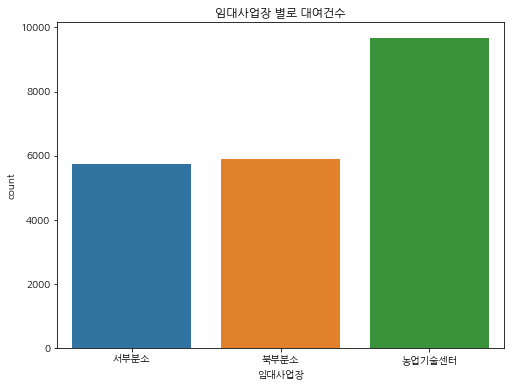

In [ ]:
plt.subplots(figsize = (8,6))
sns.countplot(x = '임대사업장', data = data)
plt.title('임대사업장 별로 대여건수')
plt.show()

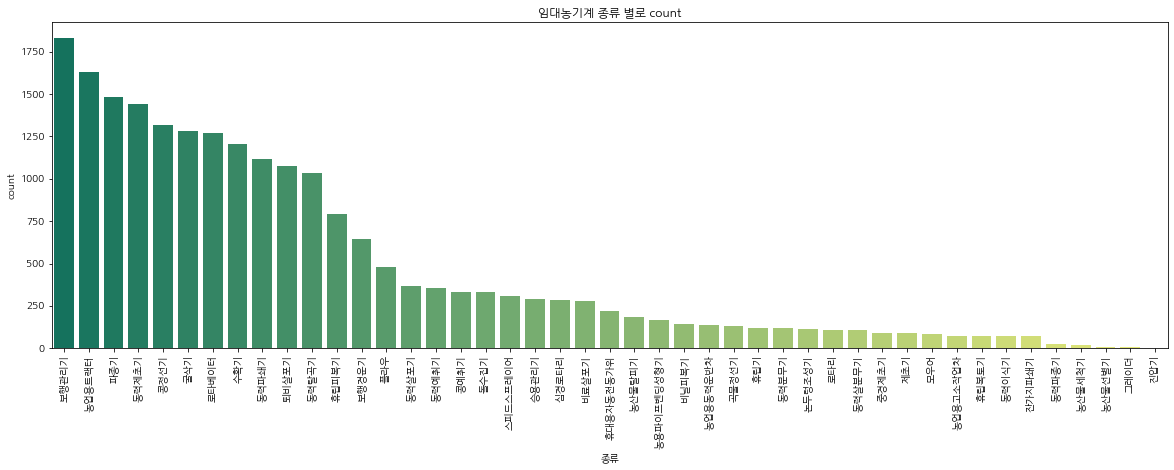

In [ ]:
plt.subplots(figsize = (20,6))
sns.countplot(x = '종류', data = data, order = data['종류'].value_counts().index, palette = 'summer')
plt.title('임대농기계 종류 별로 count')
plt.xticks(rotation = 90)
plt.show()

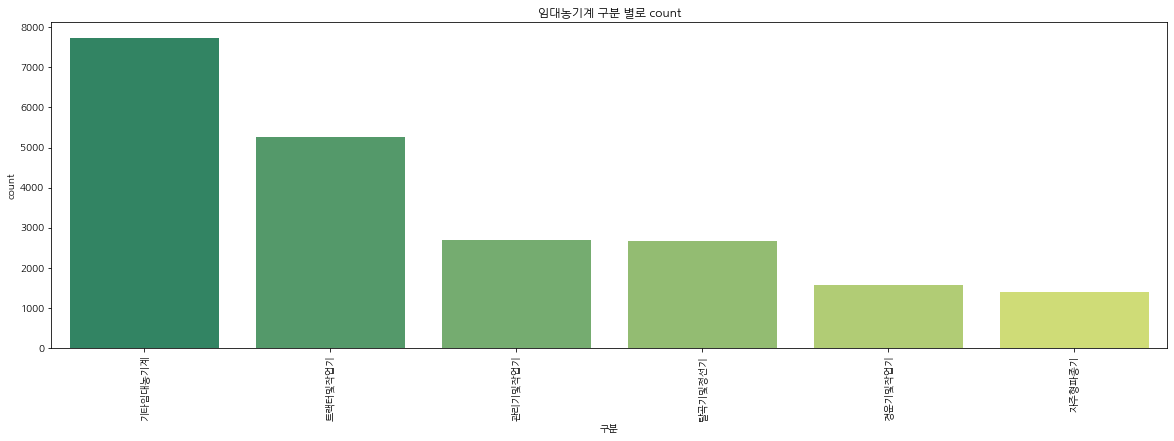

In [ ]:
plt.subplots(figsize = (20,6))
sns.countplot(x = '구분', data = data, order = data['구분'].value_counts().index, palette = '')
plt.title('임대농기계 구분 별로 count')
plt.xticks(rotation = 90)
plt.show()

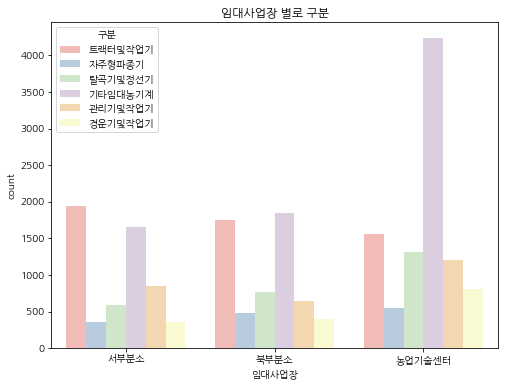

In [ ]:
plt.subplots(figsize = (8,6))
sns.countplot(x = '임대사업장', hue = '구분', data = data, palette = 'Pastel1')
plt.title('임대사업장 별로 구분')
plt.show()

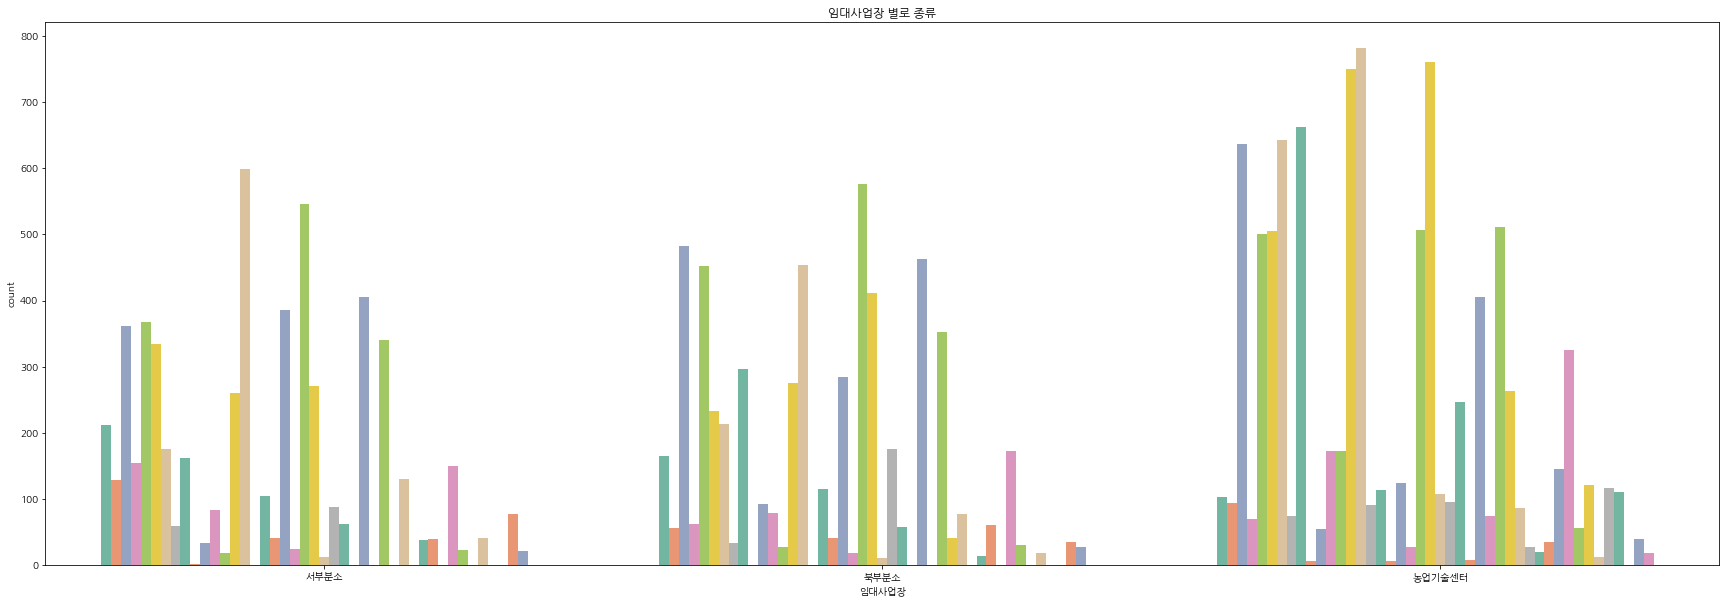

In [ ]:
plt.subplots(figsize = (30,10))
sns.countplot(x = '임대사업장', hue = '종류', data = data, palette = 'Set2')
plt.title('임대사업장 별로 종류')
plt.legend().remove()
plt.show()

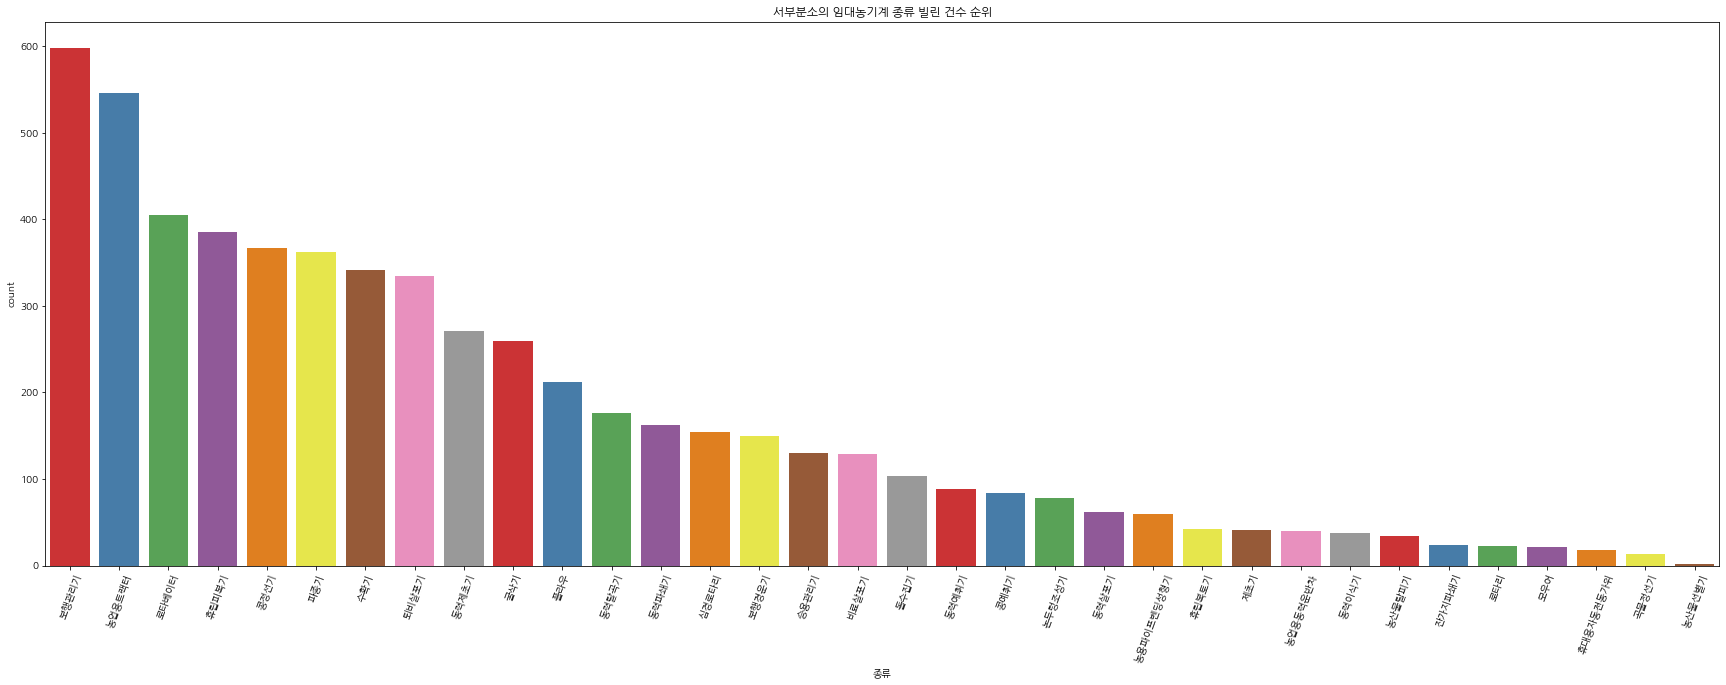

In [ ]:
tmp = data[data['임대사업장'] == '서부분소']

plt.subplots(figsize = (30,10))
sns.countplot(x = '종류', data = tmp ,order = tmp['종류'].value_counts().index, palette = 'Set1')
plt.title('서부분소의 임대농기계 종류 빌린 건수 순위')
plt.xticks(rotation = 70)
plt.show()

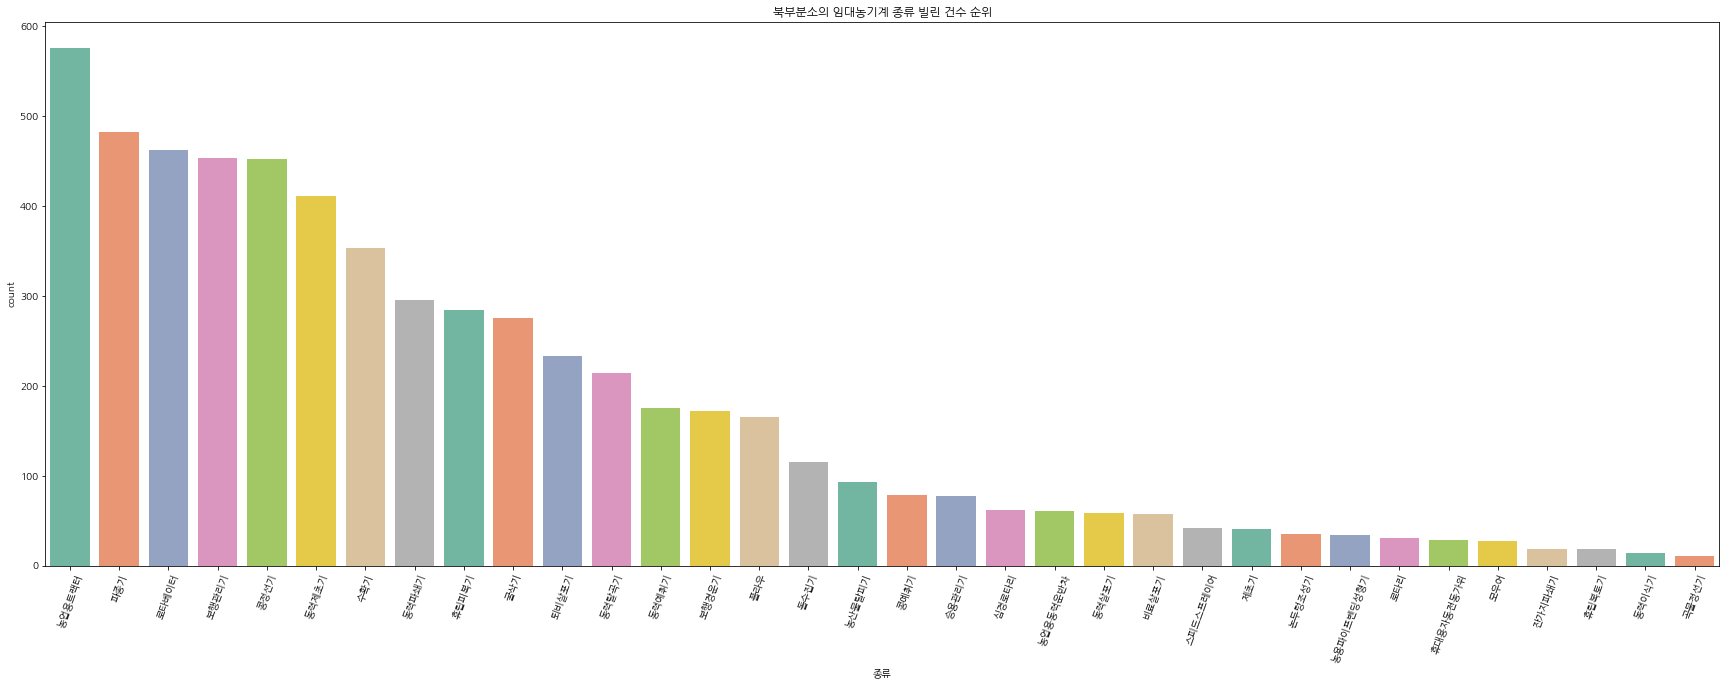

In [ ]:
tmp = data[data['임대사업장'] == '북부분소']

plt.subplots(figsize = (30,10))
sns.countplot(x = '종류', data = tmp ,order = tmp['종류'].value_counts().index, palette = 'Set2')
plt.title('북부분소의 임대농기계 종류 빌린 건수 순위')
plt.xticks(rotation = 70)
plt.show()

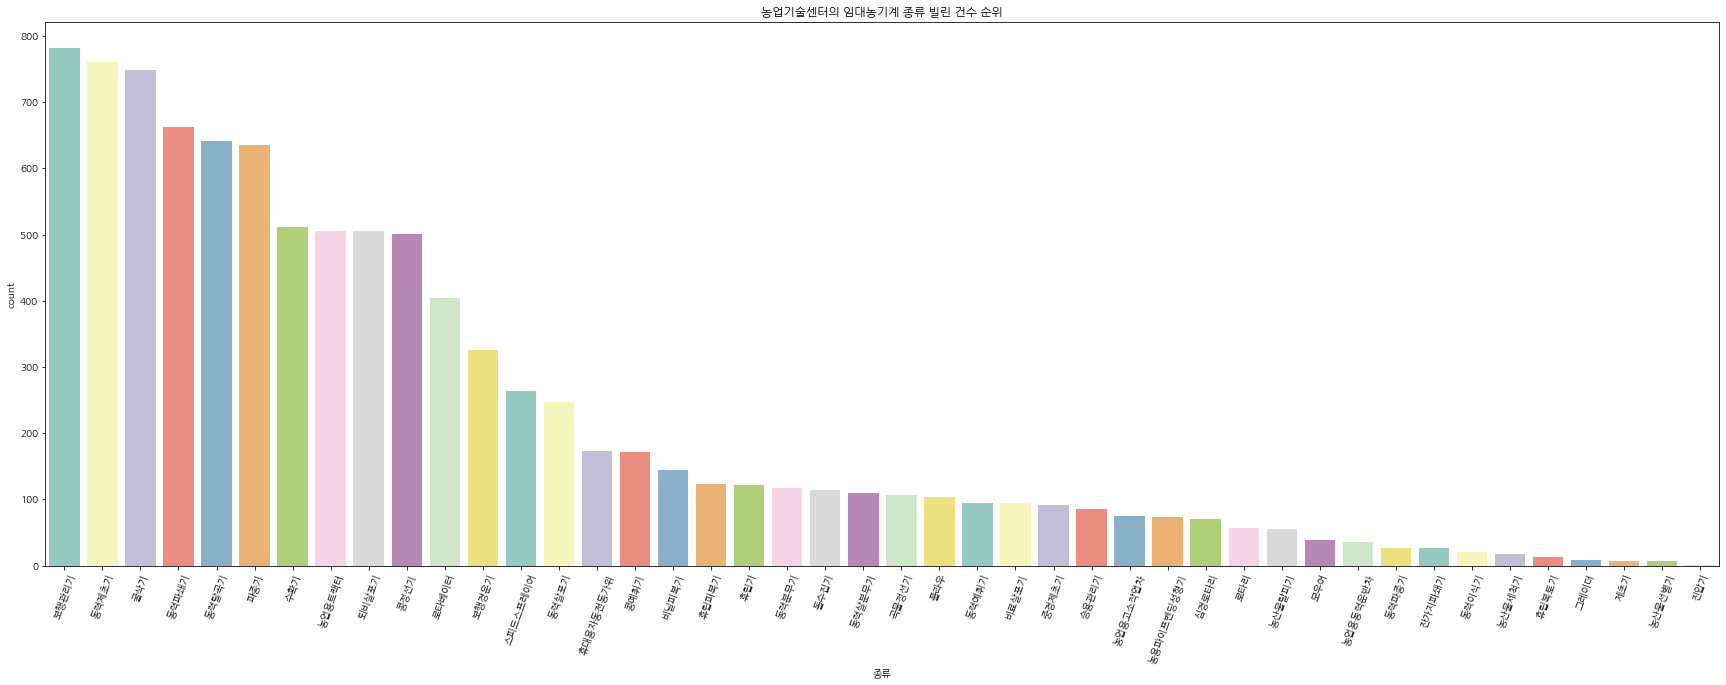

In [ ]:
tmp = data[data['임대사업장'] == '농업기술센터']

plt.subplots(figsize = (30,10))
g = sns.countplot(x = '종류', data = tmp ,order = tmp['종류'].value_counts().index, palette = 'Set3')
plt.title('농업기술센터의 임대농기계 종류 빌린 건수 순위')
plt.xticks(rotation = 70)

# for index, row in tmp.groupby('종류').size().reset_index().iterrows():
#     g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")

plt.show()

# 농업기술센터와 서부/북부 분소의 농기계 임대 건수에 순서 차이가 있다
# 보행관기리기는 늘 1위이나 동력제초기 vs 파종기
# 임대사업소에서 빌리는 지역마다 어떤 다른 농사 특징이 있는게 아닐까?

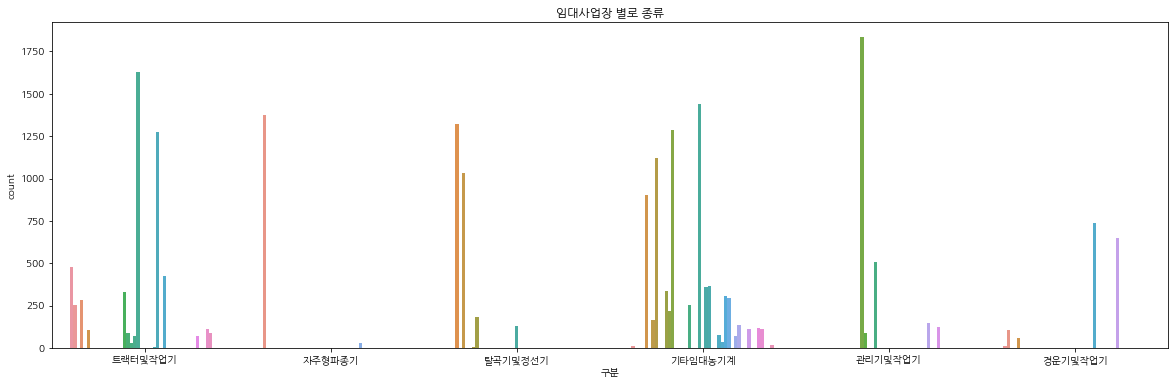

In [ ]:
plt.subplots(figsize = (20,6))
sns.countplot(x = '구분', hue = '종류', data = data)
plt.legend().remove()
plt.title('임대사업장 별로 종류')
plt.show()

In [ ]:
# datadt = pd.read_csv('D:\\python\\bigdataproject\\kk2.csv', encoding = 'euc-kr')
datadt = pd.read_csv('/content/drive/MyDrive/공빅데-농기계/kk2.csv', encoding = 'euc-kr')

In [ ]:
datadt = datadt.drop(['Unnamed: 0', 'Unnamed: 0.1','임대기간','임대시작기간', '임대반납기간'], axis = 1)
datadt['date'] = datadt['date'].str.split(' ').str[0]

In [ ]:
datadt['yaer'] = datadt['date'].str.split('-').str[0]
datadt['month'] = datadt['date'].str.split('-').str[1]
datadt['day'] = datadt['date'].str.split('-').str[2]

In [ ]:
datadt['주소']

0        경상북도 안동시 풍산읍
1        경상북도 안동시 풍산읍
2        경상북도 안동시 풍산읍
3        경상북도 안동시 중구동
4        경상북도 안동시 중구동
             ...     
27535    경상북도 안동시 송하동
27536    경상북도 안동시 풍천면
27537    경상북도 안동시 풍천면
27538    경상북도 안동시 도산면
27539    경상북도 안동시 풍산읍
Name: 주소, Length: 27540, dtype: object

In [ ]:
datadt.head(2)

,임대사업장,주소,임대농기계2,구분,종류,기종2,date,yaer,month,day
0,서부분소,경상북도 안동시 풍산읍,서플라우(트),트랙터및작업기,플라우,서플라우(트),2018-04-20,2018,04,20
1,서부분소,경상북도 안동시 풍산읍,서플라우(트),트랙터및작업기,플라우,서플라우(트),2018-04-21,2018,04,21


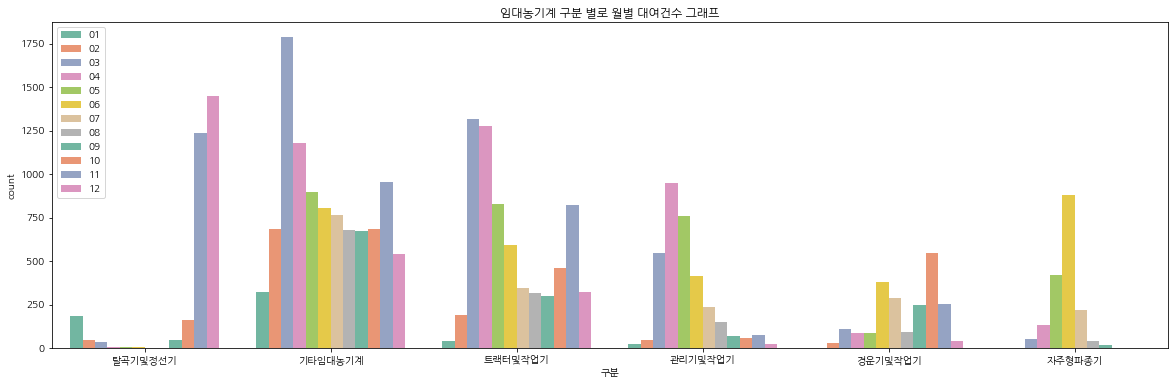

In [ ]:
plt.subplots(figsize = (20,6))
sns.countplot(x = '구분', hue = 'month', data = datadt.sort_values(['month']), palette='Set2')
plt.legend(loc = 'best')
plt.title('임대농기계 구분 별로 월별 대여건수 그래프')
plt.show()

In [ ]:
datadt['자치구'] = datadt['주소'].str.split(' ').str[0]
datadt['시군구'] = datadt['주소'].str.split(' ').str[1]
datadt['읍면동'] = datadt['주소'].str.split(' ').str[2]

datadt = datadt[(datadt['자치구'] == '경상북도') & (datadt['시군구'] == '안동시')]

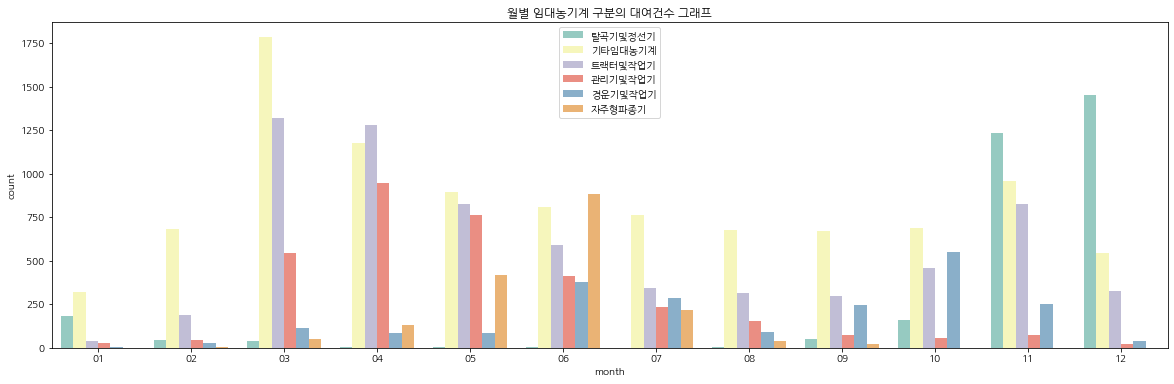

In [ ]:
#ver2 : x = 월
plt.subplots(figsize = (20,6))
sns.countplot(x = 'month', hue = '구분', data = datadt.sort_values(['month']), palette='Set3')
plt.legend(loc = 'best')
plt.title('월별 임대농기계 구분의 대여건수 그래프')
plt.show()

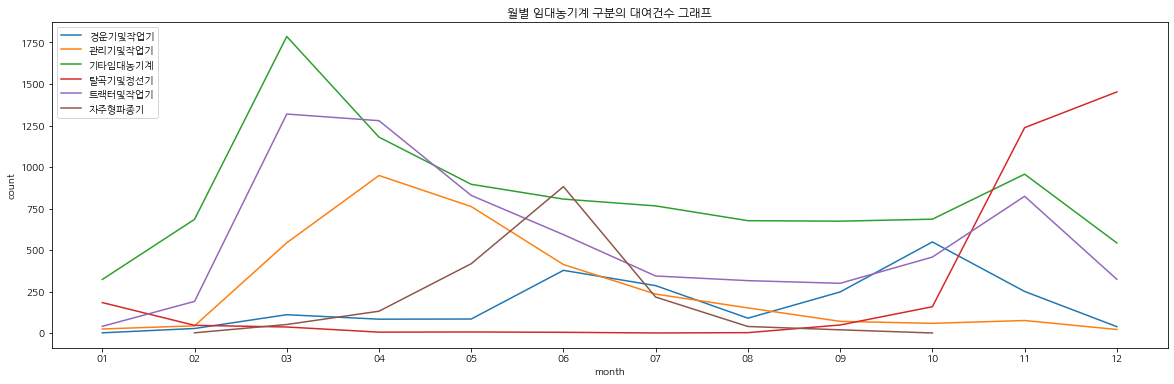

In [ ]:
# ver3
# lineplot : 시각화가 그다지 예쁘지 않아서 다른 방식으로 했으면 좋겠음
tmp = pd.DataFrame({'count' : datadt[['month','구분']].groupby(['month','구분']).size()}).reset_index()

plt.subplots(figsize = (20,6))
sns.lineplot(x = 'month',y = 'count', hue = '구분', data = tmp.sort_values(['month']))
plt.legend(loc = 'best')
plt.title('월별 임대농기계 구분의 대여건수 그래프')
plt.show()

In [ ]:
############################################################################################

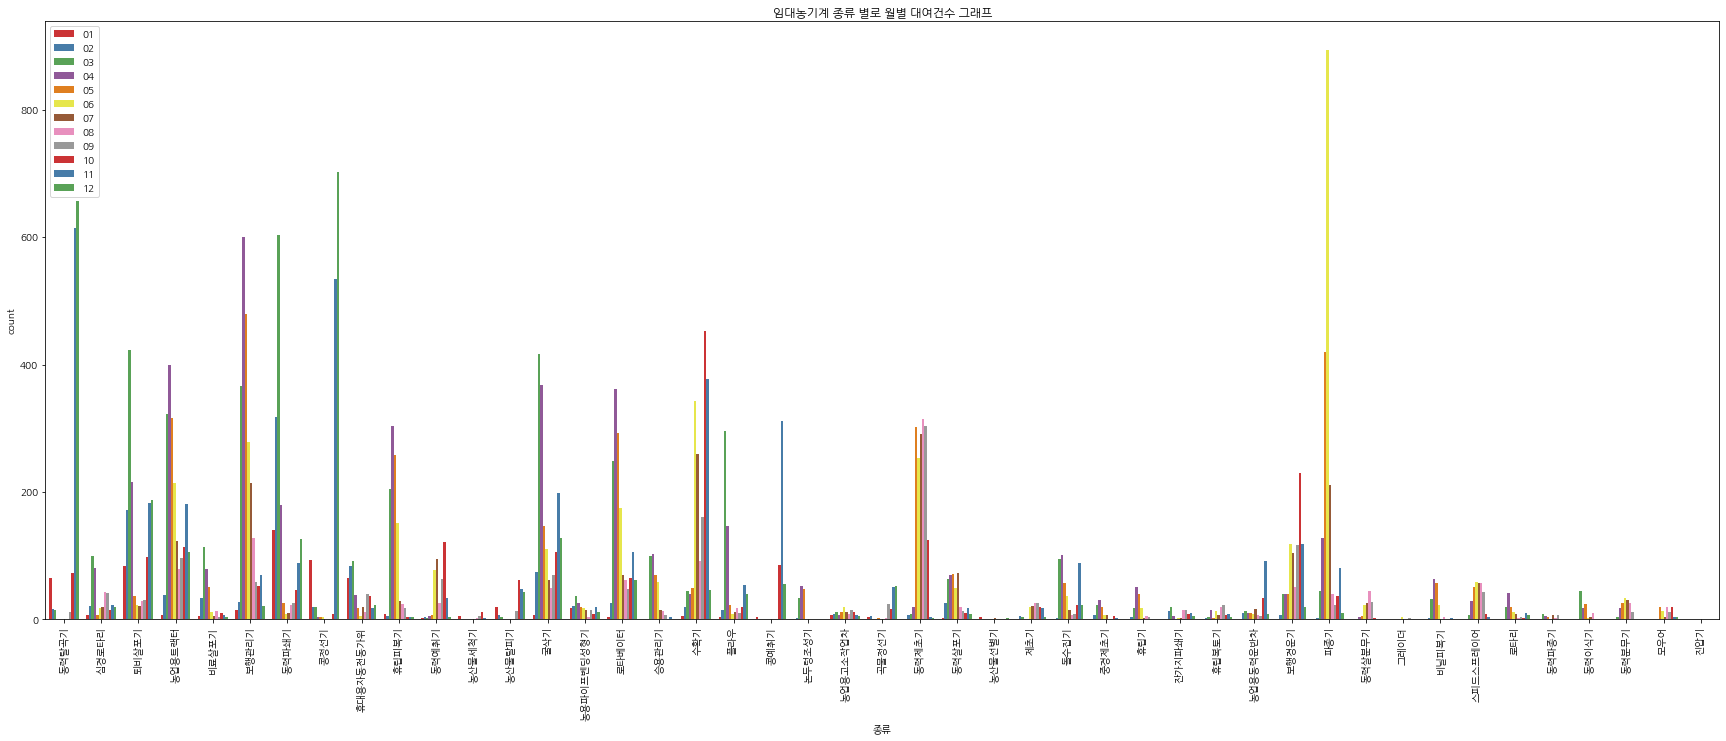

In [ ]:
plt.subplots(figsize = (30,11))
sns.countplot(x = '종류', hue = 'month', data = datadt.sort_values(['month']), palette='Set1')
plt.legend(loc = 'best')
plt.title('임대농기계 종류 별로 월별 대여건수 그래프')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# y축의 범위가 너무 커서 수치가 안 보이는 것인지 의심됨
# barplot으로 월별 임대건수를 봐야 할 것 같음

tmp1 = datadt[['month','구분','종류']].groupby(['구분','month'], as_index = False).count()
tmp2 = datadt[['month','구분','종류']].groupby(['종류','month'], as_index = False).count()
tmp1.rename(columns = {'종류' : 'count'}, inplace = True)
tmp2.rename(columns = {'구분' : 'count'}, inplace = True)

In [ ]:
tmp1.head(1)

,구분,month,count
0,경운기및작업기,01,2


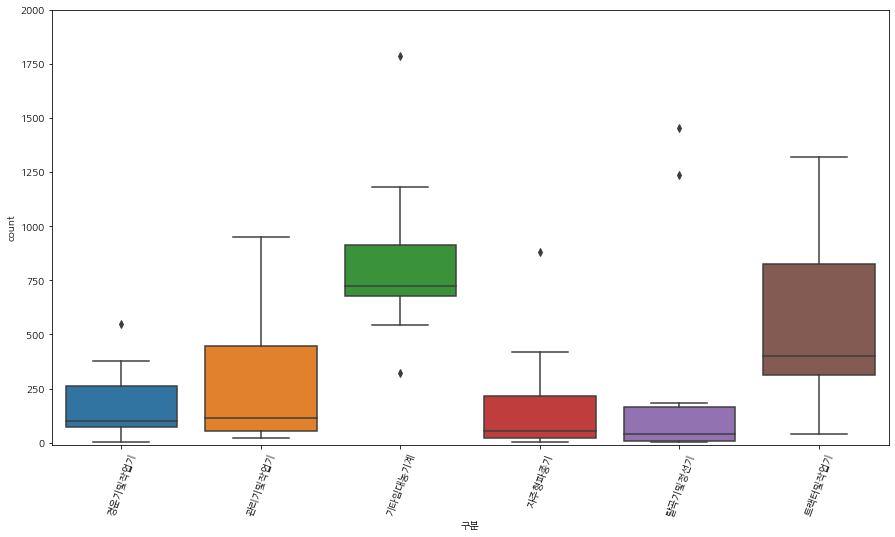

In [ ]:
plt.subplots(figsize = (15,8))
sns.boxplot(x = '구분', y = 'count', data = tmp1)
plt.ylim(-10,2000)
plt.xticks(rotation = 70)
plt.show()

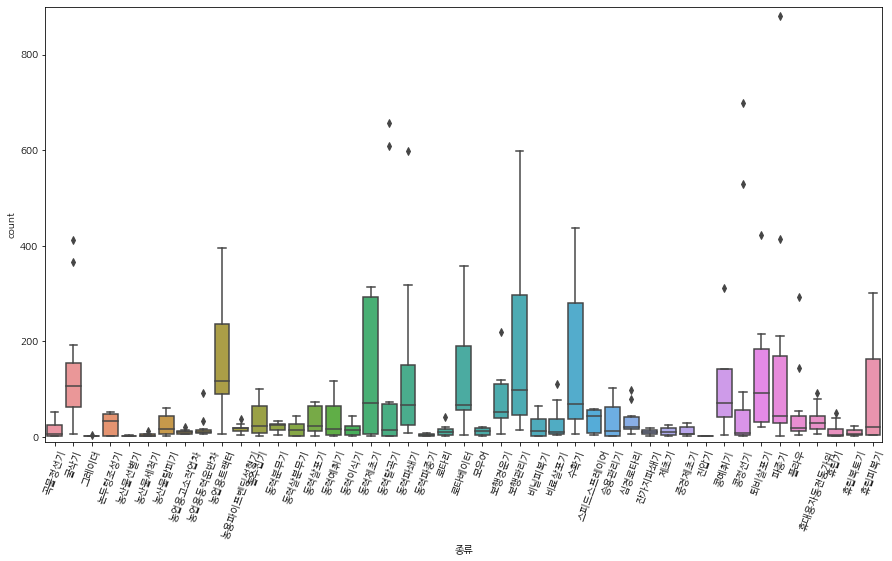

In [ ]:
plt.subplots(figsize = (15,8))
sns.boxplot(x = '종류', y = 'count', data = tmp2)
plt.ylim(-10,900)
plt.xticks(rotation = 70)
plt.show()

In [ ]:
# 시간의 흐름에 따라 빌리는 변화를 보려고 하는데
# 

In [ ]:
tmp = datadt.sort_values(['month'])

pd.crosstab(tmp['구분'], tmp['month'], margins=True).style.background_gradient(cmap = 'Oranges')

month,01,02,03,04,05,06,07,08,09,10,11,12,All
구분,,,,,,,,,,,,,
경운기및작업기,2,28,111,84,85,378,286,90,248,549,251,39,2151
관리기및작업기,25,44,544,949,762,413,235,152,71,59,76,22,3352
기타임대농기계,323,685,1786,1180,896,807,766,677,674,686,957,543,9980
자주형파종기,0,2,52,132,418,882,217,40,20,1,0,0,1764
탈곡기및정선기,184,47,37,6,7,5,1,3,49,159,1237,1452,3187
트랙터및작업기,41,191,1319,1279,829,593,344,316,300,458,824,324,6818
All,575,997,3849,3630,2997,3078,1849,1278,1362,1912,3345,2380,27252


In [ ]:
tmp = datadt.sort_values(['month'])

pd.crosstab(tmp['month'], tmp['구분'],margins=True).style.background_gradient(cmap = 'Purples')

구분,경운기및작업기,관리기및작업기,기타임대농기계,자주형파종기,탈곡기및정선기,트랙터및작업기,All
month,,,,,,,
01,2,25,323,0,184,41,575
02,28,44,685,2,47,191,997
03,111,544,1786,52,37,1319,3849
04,84,949,1180,132,6,1279,3630
05,85,762,896,418,7,829,2997
06,378,413,807,882,5,593,3078
07,286,235,766,217,1,344,1849
08,90,152,677,40,3,316,1278
09,248,71,674,20,49,300,1362


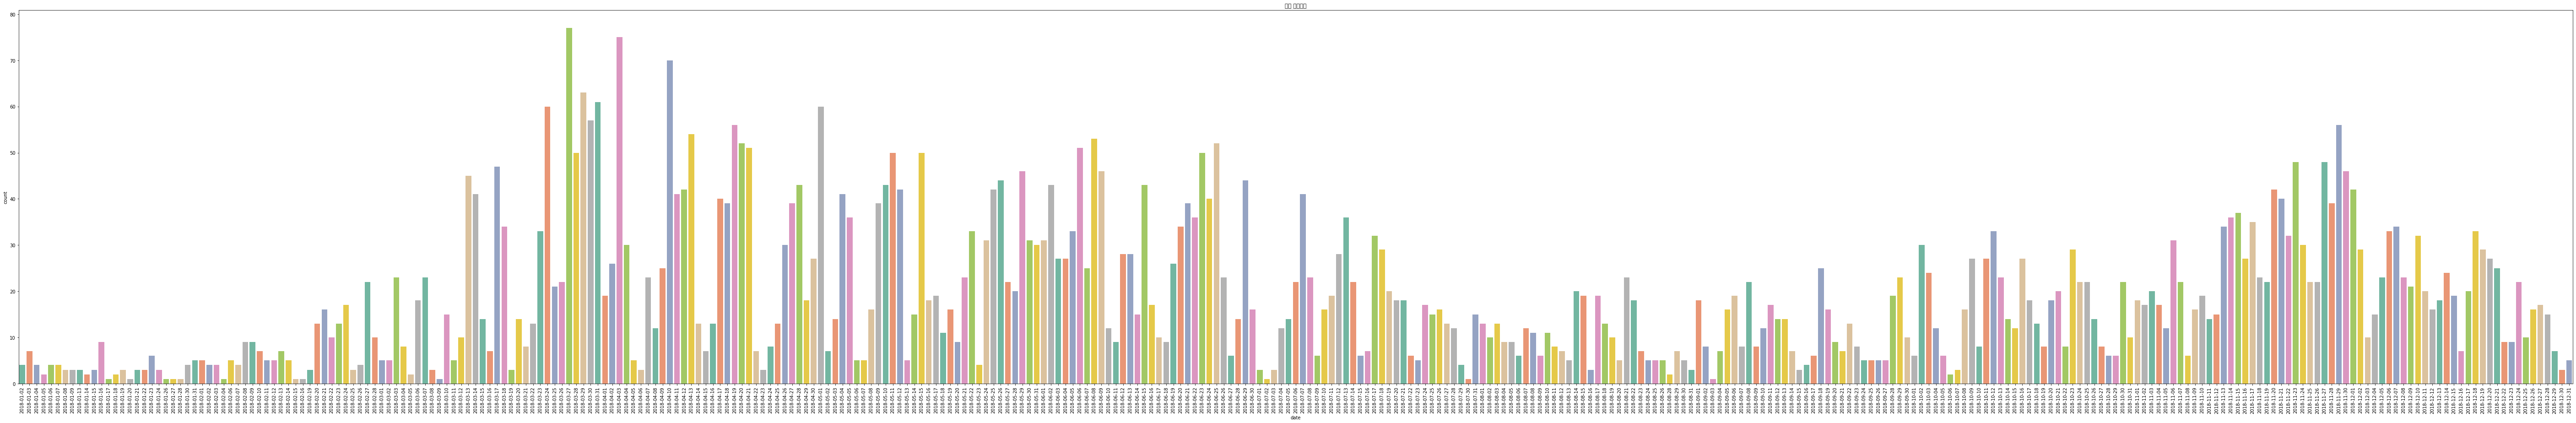

In [ ]:
datadt2 = datadt.sort_values(['date'])

plt.subplots(figsize = (100,15))
sns.countplot(x = 'date', data = datadt2[datadt2['date'].str.contains('2018')], palette = 'Set2')
plt.title('일별 대여건수')
plt.xticks(rotation = 90)
plt.show()

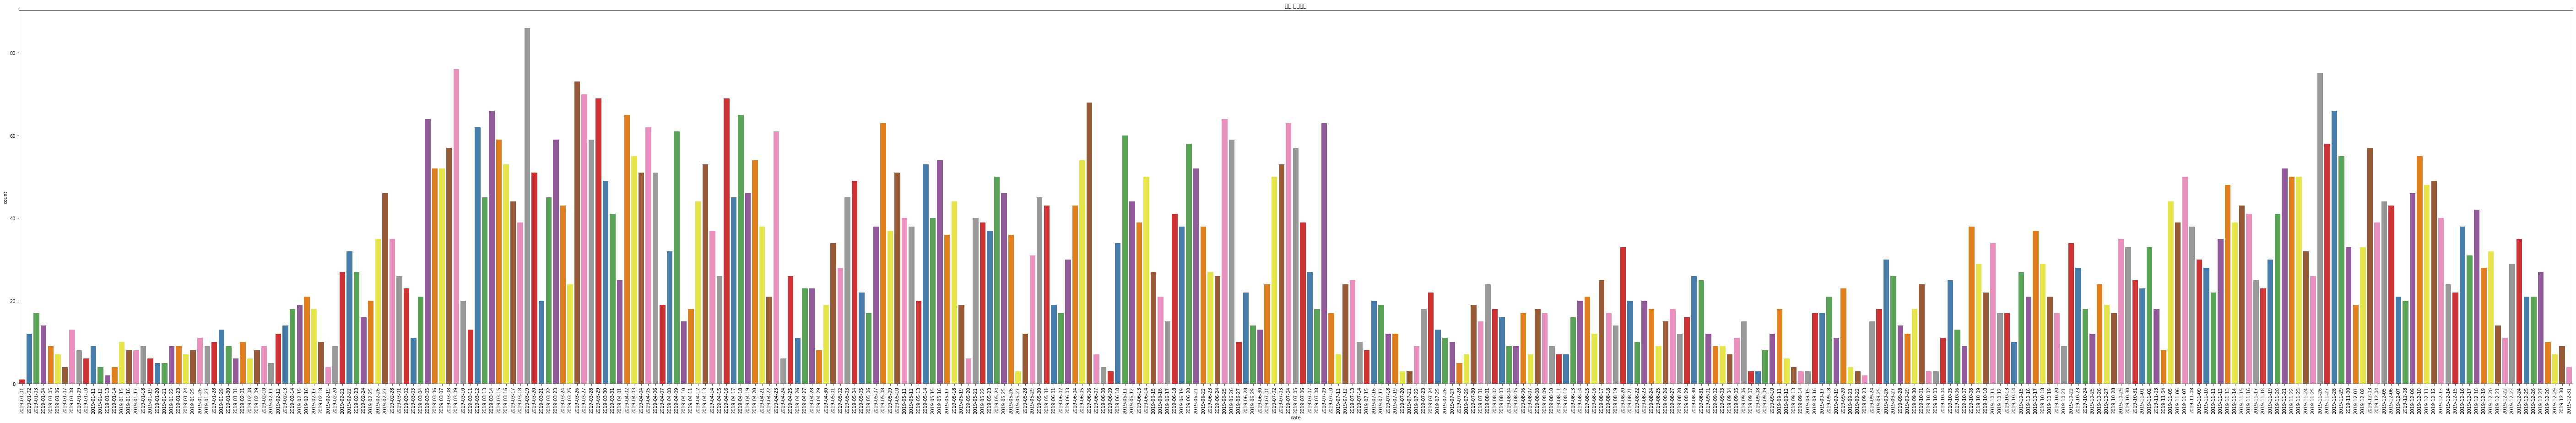

In [ ]:
datadt2 = datadt.sort_values(['date'])

plt.subplots(figsize = (100,15))
sns.countplot(x = 'date', data = datadt2[datadt2['date'].str.contains('2019')], palette = 'Set1')
plt.title('일별 대여건수')
plt.xticks(rotation = 90)
plt.show()

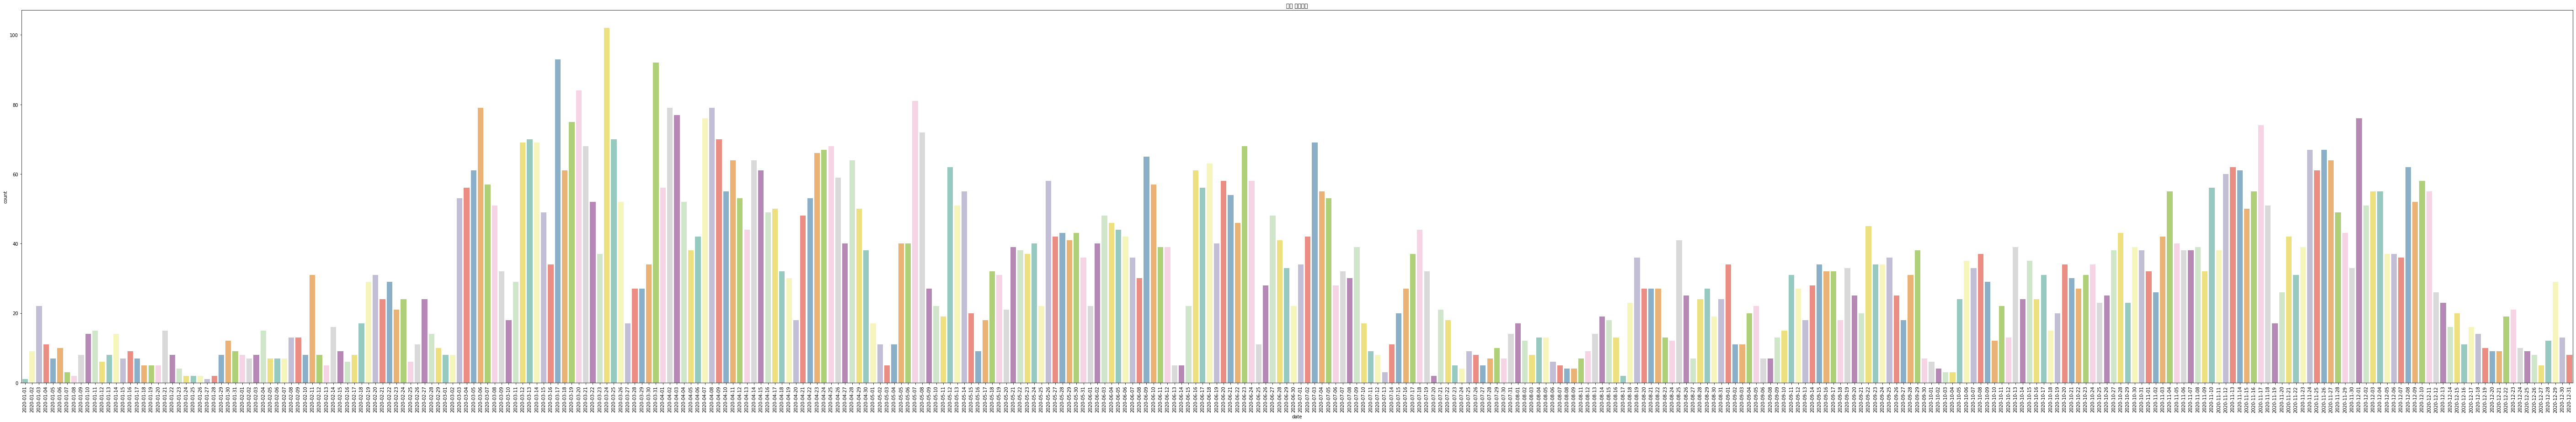

In [ ]:
datadt2 = datadt.sort_values(['date'])

plt.subplots(figsize = (100,15))
sns.countplot(x = 'date', data = datadt2[datadt2['date'].str.contains('2020')], palette = 'Set3')
plt.title('일별 대여건수')
plt.xticks(rotation = 90)
plt.show()

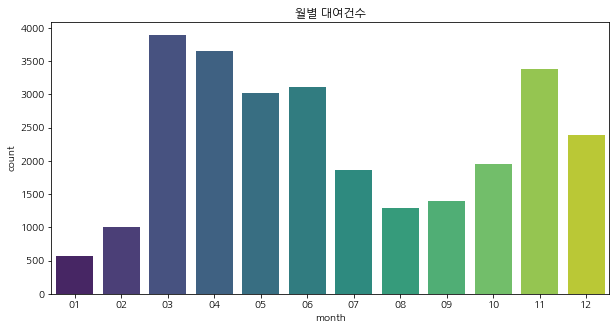

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x = 'month', data = datadt.sort_values(['month']), palette = 'viridis')
plt.title('월별 대여건수')
plt.show()

In [ ]:
datadt.head(3)

,임대사업장,주소,임대농기계2,구분,종류,기종2,date,yaer,month,day
0,서부분소,경상북도 안동시 풍산읍,서플라우(트),트랙터및작업기,플라우,서플라우(트),2018-04-20,2018,04,20
1,서부분소,경상북도 안동시 풍산읍,서플라우(트),트랙터및작업기,플라우,서플라우(트),2018-04-21,2018,04,21
2,서부분소,경상북도 안동시 풍산읍,서비료살포기(트)(PTO방식),트랙터및작업기,비료살포기,서비료살포기(트)(PTO방식),2018-04-03,2018,04,03


In [ ]:
pd.crosstab(datadt['임대사업장'], datadt['읍면동'], margins = True).style.background_gradient(cmap = 'YlGn')

읍면동,강남동,경동로,경북대로,길안면,남부동,남선면,남후면,녹전면,대안로,도산면,말구리길,명륜동,뱀바위길,북후면,서구동,서후면,송하동,송현동,안기동,어가골윗길,예안면,옥동,와룡면,용상동,육사로,음식의길,일직면,임동면,임하면,제봉길,중구동,태화동,평화동,풍산읍,풍천면,All
임대사업장,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
농업기술센터,344,36,0,1602,5,1000,163,249,0,240,1,239,2,307,219,381,344,107,422,0,248,341,530,1271,4,1,631,961,1573,10,143,276,178,321,197,12346
북부분소,67,18,0,33,0,35,13,1035,0,1029,0,210,0,739,106,187,160,37,125,0,713,172,1943,324,0,0,33,25,42,2,161,178,76,84,20,7567
서부분소,31,16,3,48,0,77,266,52,1,38,0,8,0,145,101,697,190,48,94,2,35,276,84,116,8,0,163,32,36,40,54,171,94,3317,1095,7338
All,442,70,3,1683,5,1112,442,1336,1,1307,1,457,2,1191,426,1265,694,192,641,2,996,789,2557,1711,12,1,827,1018,1651,52,358,625,348,3722,1312,27251


In [ ]:
pd.crosstab(datadt['읍면동'], datadt['임대사업장'], margins = True).style.background_gradient(cmap = 'Pastel1')

임대사업장,농업기술센터,북부분소,서부분소,All
읍면동,,,,
강남동,344,67,31,442
경동로,36,18,16,70
경북대로,0,0,3,3
길안면,1602,33,48,1683
남부동,5,0,0,5
남선면,1000,35,77,1112
남후면,163,13,266,442
녹전면,249,1035,52,1336
대안로,0,0,1,1


#### 임대사업소 
* 농업기술센터 : 강남동, 길안면, 남선면, 서구동, 송하동, 송현동(거의 지역 간 차이없음), 안기동, 옥동, 용상동, 일직면, 임동면, 임하면, 중구동(북부분소와 유사), 태화동, 평화동
* 북부분소 : 녹전면, 도산면, 명륜동, 북후면, 예안면, 와룡면
* 서부분소 : 남후면, 서후면, 풍산읍, 풍천면

In [ ]:
mm1 = pd.read_csv('/content/drive/MyDrive/data/managementsheet1kr.csv', encoding = 'euc-kr')
mm1.head()

,Unnamed: 0,경영체등록번호,경영체법정동주소_시도,경영체법정동주소_시군구,경영체법정동주소_읍면동,영농시작일자,농업시작형태,농업종사형태,연령,성별,기준연월일
0,3,1000023858,경상북도,안동시,풍산읍,19740101,전 생애 농업에 종사,전업,65,남,20201231
1,4,1000023908,경상북도,안동시,풍산읍,19600101,전 생애 농업에 종사,전업,84,남,20201231
2,5,1000024499,경상북도,안동시,풍산읍,19640101,전 생애 농업에 종사,전업,78,남,20201231
3,6,1000024510,경상북도,안동시,풍산읍,19640101,전 생애 농업에 종사,전업,82,남,20201231
4,7,1000024595,경상북도,안동시,풍산읍,19740101,다른 산업에서 전환,전업,72,남,20201231


In [ ]:
mm2 = pd.read_csv('/content/drive/MyDrive/data/managementsheet2kr.csv', encoding = 'euc-kr')

In [ ]:
mm2 = mm2[(mm2['농지주소_시도'] == '경상북도') & (mm2['농지주소_시군구'] == '안동시')]

In [ ]:
mm2